# Проект: Отток клиентов

**Описание исседования** <br>
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.<br>
Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

**Описание данных** <br>
Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

***Признаки***

*'RowNumber'* — индекс строки в данных<br>
*'CustomerId'* — уникальный идентификатор клиента<br>
*'Surname'* — фамилия<br>
*'CreditScore'* — кредитный рейтинг<br>
*'Geography'* — страна проживания<br>
*'Gender'* — пол<br>
*'Age'* — возраст<br>
*'Tenure'* — сколько лет человек является клиентом банка<br>
*'Balance'* — баланс на счёте<br>
*'NumOfProducts'* — количество продуктов банка, используемых клиентом<br>
*'HasCrCard'* — наличие кредитной карты<br>
*'IsActiveMember'* — активность клиента<br>
*'EstimatedSalary'* — предполагаемая зарплата<br>

***Целевой признак***

*'Exited'* — факт ухода клиента

**Содержание**

 [Шаг 1. Загрузка и подготовка данныx](#step1)
 
 [Шаг 2. Баланс классов. Обучение модели без учёта дисбаланса](#step2)
 
 [Шаг 3. Обучение модели с учетом дисбаланса классов. Выбор модели](#step3)
 
 [Шаг 4. Финальное тестирование](#step4)
 
 [Общий вывод](#step5)

<a id = 'step1'></a>
# Шаг 1. Загрузка и подготовка данных

In [1]:
#импортируем библиотеки
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#считываем файл
if os.path.exists('Churn.csv'):
    data = pd.read_csv('Churn.csv') #локальный путь
else:
    data = pd.read_csv(f'/datasets/Churn.csv') #путь, указанный в проекте
        

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [4]:
#смотрим первые 10 строк
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
#удалим ненужные столбцы
data.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

In [6]:
#смотрим, признаки какого типа хранятся в таблице 
data.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
print('Размер датасета:', data.shape)

Размер датасета: (10000, 11)


In [8]:
print(data['Geography'].unique())
print(data['Gender'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']


In [9]:
#OHE преобразование
data_ohe = pd.get_dummies(data, drop_first=True)

In [10]:
print('Размер датасета:', data_ohe.shape)

Размер датасета: (10000, 12)


In [11]:
# преобразуем тип данных
data_ohe['Tenure'] = data_ohe['Tenure'].astype('Int64')
data_ohe.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2,134603.88,1,1,1,71725.73,0,0,0,1


In [12]:
(data_ohe.isna().sum()/data_ohe.shape[0]).map('{:.2%}'.format)

CreditScore          0.00%
Age                  0.00%
Tenure               9.09%
Balance              0.00%
NumOfProducts        0.00%
HasCrCard            0.00%
IsActiveMember       0.00%
EstimatedSalary      0.00%
Exited               0.00%
Geography_Germany    0.00%
Geography_Spain      0.00%
Gender_Male          0.00%
dtype: object

In [13]:
#data_ohe = data_ohe[~data_ohe['Tenure'].isna()]

In [14]:
data_ohe.fillna(data['Tenure'].median(), inplace=True)
data_ohe.isna().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [15]:
#разделим выборку на обучающую, валидационную и тестовую

#сначала делим выборку на обучающую и временную
train, temp = train_test_split(data_ohe, test_size = 0.4, random_state = 12345)

#выделяем признаки и целевой признак обучающей выборки
features_train = train.drop('Exited', axis = 1)
target_train = train['Exited']

#выделяем признаки и целевой признак  временной выборки
features = temp.drop('Exited', axis = 1)
target = temp['Exited']

#разобъем получившуюся временную выборку на валидационную и тестовую
features_valid, features_test, target_valid, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size = 0.5, 
                                                                            random_state = 12345)

In [16]:
#масштабирование признаков

#список численных признаков
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

#cоздадим объект структуры StandardScaler() и настроим его на обучающих данных
scaler = StandardScaler()
scaler.fit(features_train[numeric])

pd.options.mode.chained_assignment = None

#преобразуем выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [17]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.082277,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.082277,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.737696,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.354288,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.101690,1.140475,-0.891560,0,0,1.524268,1,0,0


<div class="alert alert-block alert-info">
    
**Комментарий студента** 
    
На этом этапе я пробовала удалять строки (закоментировано в коде) с пропуском в столбце "Tenure" - это около 9% данных. Это приводит к улучшению прогнозирования на валидационной выборке - F1 = 0.64, но на тестовой выборке метрика F1 выше, если пропуски заполнять, что я в итоге и делаю.  

<a id = 'step2'></a>
# Шаг 2. Исседование баланса классов. Обучение модели без учета дисбаланса


In [18]:
#обучим моедль без учета дисбаланса 
model =  LogisticRegression(random_state=12345)
model.fit(features_train,target_train)

predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid,target_valid)
print(accuracy_valid)

0.802


**Проверка модели на  адекватность**

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<AxesSubplot:>

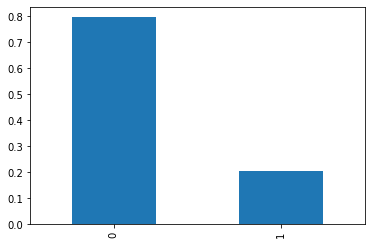

In [19]:
#смотрим баланс классов
class_frequency = data_ohe['Exited'].value_counts(normalize = True)
print(class_frequency)
class_frequency.plot(kind = 'bar')

0    0.913
1    0.087
dtype: float64


<AxesSubplot:>

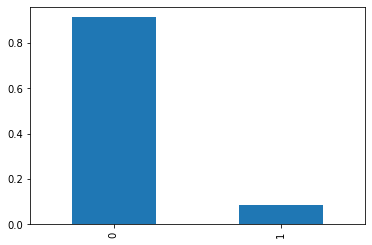

In [20]:
#анализируем частоты классов в результате предсказаний 
predicted_valid = pd.Series(predicted_valid)
class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar') 

In [21]:
#создаем константную модель 
target_pred_constant = pd.Series([0]*len(target_valid))
accuracy_valid = accuracy_score(target_valid,target_pred_constant)
print(accuracy_valid) 

0.791


In [22]:
#рассчитаем матрицу ошибок
print(confusion_matrix(target_valid,predicted_valid))

[[1506   76]
 [ 320   98]]


In [23]:
#способность модели распознавать положительный класс
print(recall_score(target_valid,predicted_valid))

0.23444976076555024


In [24]:
#точность
print(precision_score(target_valid,predicted_valid))

0.5632183908045977


In [25]:
#среднее гармоничское
print(f1_score(target_valid,predicted_valid))

0.33108108108108103


In [26]:
#попробуем алгоритм случайного леса
model =  RandomForestClassifier(random_state=12345)
model.fit(features_train,target_train)

predicted_valid = model.predict(features_valid)
accuracy_valid = accuracy_score(predicted_valid,target_valid)
print('Accuracy:', accuracy_valid)
print('F1-score:', f1_score(target_valid,predicted_valid))

Accuracy: 0.8585
F1-score: 0.5769805680119582


<div class="alert alert-block alert-info">
    
**Комментарий студента** 

Классы несбалансированы: гораздо больше отрицательных ответов, как в случае до обучения модели, так и после. 

Сравнивая нашу модель с константной, делаем вывод, что  проверку на адекватность она не проходит. Кроме того, её можно назвать пессимистичной - она часто видит отрицатеьные ответы там, где их нет.<br>
Среднее гармоническое между полнотой и точностью - 0.33. Слишком низкий показатель для нашей задачи.

В случае с алгоритмом RandomForest ситуация лучше, но все еще недостаточно высокий показатель метрики F1-score. 

<a id = 'step3'></a>
# Шаг 3. Обучение модели с учетом дисбаланса классов. Выбор модели

In [27]:
#функция увеличения или уменьшения выборки (взависимости от параметра 'way')

def up_down_sample(features, target, way):
    
    #делим элементы на положитеьные и отрицательные
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target ==1]
    
    if way == 0: 
        #print('input number')
        #repeat = int(input())
        
        repeat = 9
        features_convert = pd.concat([features_zero] + [features_one]*repeat)
        target_convert = pd.concat([target_zero] + [target_one]*repeat)
        
    else:
        #print('input fruction')
        #fraction = float(input())
        
        fraction = 0.1
        features_convert = pd.concat([features_zero.sample(frac=fraction, random_state=12345)] + [features_one])
        target_convert = pd.concat([target_zero.sample(frac=fraction, random_state=12345)] + [target_one])
        
        
        
    features_convert, target_convert = shuffle(features_convert, target_convert, random_state=12345)
    
    return features_convert,target_convert   



In [28]:
#увеличенная обучающую выборка
features_upsampled, target_upsampled = up_down_sample(features_train, target_train, 0)

#уменьшенная обучающую выборка
features_downsampled, target_downsampled = up_down_sample(features_train, target_train, 1)

**Логистическая регрессия**

In [29]:
#придаем объектам редкого класса больший вес
model = LogisticRegression(random_state=12345, class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print("F1-score: {:.4f}".format(f1_score(target_valid, predicted_valid)))
print("AUC-ROC: {:.4f}".format(roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])))

F1-score: 0.4889
AUC-ROC: 0.7637


In [36]:
model.predict_proba(features_valid)[:,1]

array([0.44714814, 0.39623671, 0.51581073, ..., 0.32762512, 0.61877608,
       0.81374436])

In [29]:
model = LogisticRegression(random_state=12345,)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1-score с увеличеннной выборкой: {:.4f}".format(f1_score(target_valid, predicted_valid)))
print("AUC-ROC: {:.4f}".format(roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])))

model = LogisticRegression(random_state=12345,)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print()
print("F1-score с уменьшенной выборкой: {:.4f}".format(f1_score(target_valid, predicted_valid)))
print("AUC-ROC: {:.4f}".format(roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])))

F1-score с увеличеннной выборкой: 0.4286
AUC-ROC: 0.7651

F1-score с уменьшенной выборкой: 0.4299
AUC-ROC: 0.7579


**Случайный лес**

In [30]:
#придаем объектам редкого класса больший вес
model = RandomForestClassifier(random_state=12345, class_weight = 'balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1-score: {:.4f}".format(f1_score(target_valid, predicted_valid)))
print("AUC-ROC: {:.4f}".format(roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])))

F1-score: 0.5719
AUC-ROC: 0.8388


In [31]:
model = RandomForestClassifier(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1-score с увеличенной выборкой: {:.4f}".format(f1_score(target_valid, predicted_valid)))
print("AUC-ROC: {:.4f}".format(roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])))

model = RandomForestClassifier(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print()
print("F1-score с уменьшенной выборкой: {:.4f}".format(f1_score(target_valid, predicted_valid)))
print("AUC-ROC: {:.4f}".format(roc_auc_score(target_valid, model.predict_proba(features_valid)[:,1])))

F1-score с увеличенной выборкой: 0.5950
AUC-ROC: 0.8404

F1-score с уменьшенной выборкой: 0.4701
AUC-ROC: 0.8273


<div class="alert alert-block alert-info">
    
**Комментарий студента** 

Лучший результат на данный момент показывает модель на базе алгоритма Random Forest с увеличенной обучающей выборкой - F1 ~ 0.59.<br> Попробуем изменить гиперпараметры модели.

In [32]:
best_model_forest = None
best_est = 5
best_f1 = 0
for depth in tqdm(range(1,35,5)):
    for est in range(5, 110, 10):
        #for sample in range(2,5):
                model = RandomForestClassifier(max_depth=depth, n_estimators=est, min_samples_leaf=2, random_state=12345)
                model.fit(features_upsampled, target_upsampled)
                predicted_valid = model.predict(features_valid)
                f1 = f1_score(target_valid, predicted_valid)
                if f1 > best_f1:
                    best_f1 = f1
                    best_depth = depth
                    best_est = est
                    best_model_forest = model

print('F1 наилучшей модели на валидационной выборке:', best_f1)
print('Количество деревьев:', best_est)
print('Глубина:',best_depth)
#print('Мин. объектов в узле: ',best_sample)

100%|█████████████████████████████████████████████| 7/7 [00:27<00:00,  3.92s/it]

F1 наилучшей модели на валидационной выборке: 0.6139315230224321
Количество деревьев: 105
Глубина: 21


In [33]:
#попробуем изменить порог наилучшей модели

#вычислим вероятности принадлежности к классам
probabilities_one_valid = best_model_forest.predict_proba(features_valid)[:,1]

f1_best = 0
best_threshold = 0.3
for threshold in np.arange(0.3, 0.52, 0.02):
    p_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, p_valid)
    
    print("Порог = {:.2f}  |  F1 = {:.4f}".format(threshold, f1))
    
print()   
print("AUC-ROC: {:.4f}".format(roc_auc_score(target_valid, probabilities_one_valid))) 

Порог = 0.30  |  F1 = 0.5436
Порог = 0.32  |  F1 = 0.5580
Порог = 0.34  |  F1 = 0.5714
Порог = 0.36  |  F1 = 0.5859
Порог = 0.38  |  F1 = 0.5844
Порог = 0.40  |  F1 = 0.5947
Порог = 0.42  |  F1 = 0.5949
Порог = 0.44  |  F1 = 0.5987
Порог = 0.46  |  F1 = 0.6054
Порог = 0.48  |  F1 = 0.6092
Порог = 0.50  |  F1 = 0.6139
Порог = 0.52  |  F1 = 0.6077

AUC-ROC: 0.8381


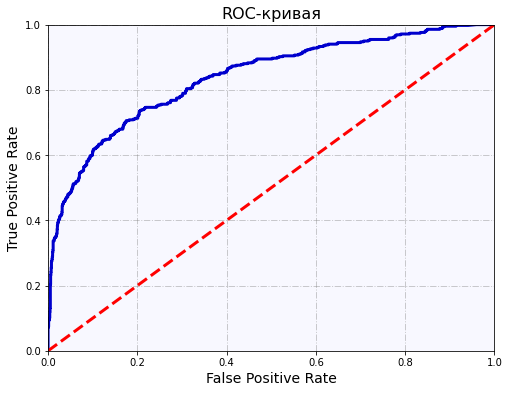

In [35]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, linewidth=3, color = 'mediumblue')

ax.plot([0, 1], [0, 1], linestyle='--', linewidth=3, color = 'r')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate',fontsize=14)
ax.set_ylabel('True Positive Rate',fontsize=14)
ax.set_title('ROC-кривая',fontsize=16)

ax.grid(color ='grey',
        linestyle ='-.', linewidth = 1,
        alpha = 0.4)
ax.set_facecolor('ghostwhite')
fig.show()

<div class="alert alert-block alert-info">
    
**Комментарий студента** 

На валидационной выборке лучший результат показывает модель Random Forest c увеличенной обучающей выборкой.Порог оставим равным 0.5. Метрика F1 = 0.6139, AUC-ROC = 0.8381

Параметры модели при этом: количество деревьев = 105, глубина = 21.

<a id = 'step4'></a>
# Шаг 4. Финальное тестирование

In [36]:
#пробуем лучшую модель на тестовой выборке
predicted_test = best_model_forest.predict(features_test)
print("F1-score: {:.4f}".format(f1_score(target_test, predicted_test)))
print("AUC-ROC: {:.4f}".format(roc_auc_score(target_test, model.predict_proba(features_test)[:,1])))

F1-score: 0.6188
AUC-ROC: 0.8546


In [37]:
# #изменяем порог до 0.48
# probabilities_one_test = best_model_forest.predict_proba(features_test)[:,1]

# p_test = probabilities_one_test > 0.48
# f1_test = f1_score(target_test, p_test)
# print("F1-score: {:.4f}".format(f1_test))


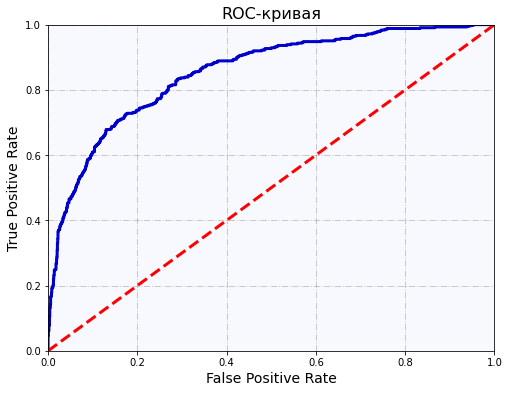

In [38]:
fpr, tpr, thresholds = roc_curve(target_test, best_model_forest.predict_proba(features_test)[:,1])

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr, tpr, linewidth=3, color = 'mediumblue')

ax.plot([0, 1], [0, 1], linestyle='--', linewidth=3, color = 'r')

ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate',fontsize=14)
ax.set_ylabel('True Positive Rate',fontsize=14)
ax.set_title('ROC-кривая',fontsize=16)

ax.grid(color ='grey',
        linestyle ='-.', linewidth = 1,
        alpha = 0.4)
ax.set_facecolor('ghostwhite')
fig.show()

<a id = 'step5'></a>

<div class="alert alert-block alert-info">
    
<h2> Общий вывод <a class="tocSkip"></h2>
    
В данной работе мы изучали предоставленную информацию о клиентах Бета-Банка, чтобы спрогнозировать, уйдёт клиент из банка в ближайшее время или нет.

При подготовке данных были обнаружены категориальные признаки в данных (Gender, Geography), которые мы преобразовали в количественные с помощью прямого кодирования (OHE - преобразование). Данные разделили на три выборки: обучающую, валидационную  и тестовую (3:1:1).

Далее мы выяснили, что классы в данных несбалансированны: преобладают объекты с отрицатеьной меткой 0. Модели логистической регрессии и случайного леса, обученные без учета дисбаланса, не пошли проверку на адекватность. Улучшить качество модели получилось путем увеличения обучающей выборки методом upsampling. 

Наилучший результат на валидационной выборке показала модель RandomForest с порогом 0.48.Среднее гармоническое между полнотой и точностью F1 = 0.6139, площадь под кривой ROC = 0.8381. Хотя порог можно было и оставить 0.5, т.к разница в тысячных. 
    
На тестовой выборке эта модель показала себя даже чуть лучше - F1 = 0.6188, AUC-ROC = 0.8546. 
</div>